<a href="https://colab.research.google.com/github/anushka1947/Machine-Learning/blob/main/NEWS_ANALYSIS_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import bs4
import textblob
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
import smtplib
import smtplib
import ssl
from email.message import EmailMessage
import matplotlib.pyplot as plt
from email.mime.image import MIMEImage
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Web Scraping
# url = 'https://indianexpress.com/article/political-pulse/punjab-floods-farmers-bhagwant-mann-8910460/'
url = 'https://sportstar.thehindu.com/cricket/t20-world-cup/india-t20-world-cup-2024-title-perfect-record-no-loss-tournament-highlights-ind-vs-sa-final/article68351990.ece#:~:text=India%20beat%20South%20Africa%20by,single%20match%20through%20the%20tournament.'
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
news = requests.get(url, headers=agent)
india = BeautifulSoup(news.content, 'lxml')
india = india.getText(strip=True)


In [3]:
#Displaying the text
india

'India becomes first team to win T20 World Cup with unbeaten record - SportstarCricketWomen\'s T20 World cupFootballChessKabaddiShortsCricketWomen\'s T20 World cupFootballChessKabaddiShortsMagazineBuy PrintLoginAccountSubscribeGo to SearchGo to SearchPREMIUMMagazinePostersColumnsSpecial EditionsStar LifeStatsmanPLAYGROUNDSArcheryAthleticsBadmintonBasketballBoxingChessCricketCue SportESPORTSFootballGolfHockeyKabaddiMMAMotorsportShootingSquashSwimmingTable TennisTennisVolleyballWrestlingMULTIMEDIAVideosGalleryPodcastSportoonON STAGEACES AwardsSportstar ConclaveLatest NewsPREMIUMMagazinePostersColumnsSpecial EditionsStar LifeStatsmanPLAYGROUNDSArcheryAthleticsBadmintonBasketballBoxingChessCricketCue SportESPORTSFootballGolfHockeyKabaddiMMAMotorsportShootingSquashSwimmingTable TennisTennisVolleyballWrestlingMULTIMEDIAVideosGalleryPodcastSportoonON STAGEACES AwardsSportstar ConclaveLatest NewsSIGN-UP / LOGINREAD e-BOOKSubscribers OnlyHave you subscribed yet?Buy PrintCONNECT WITH USGet sport

In [6]:
# Cleaning and Tokenization
india = re.sub(r'\n', "", india)
india = re.sub(r'[0-9]+', "", india)
sentence = sent_tokenize(india)

In [11]:
# Finding length of the article
len(sentence)

13

In [12]:
# Display the Text
sentence

["India becomes first team to win T World Cup with unbeaten record - SportstarCricketWomen's T World cupFootballChessKabaddiShortsCricketWomen's T World cupFootballChessKabaddiShortsMagazineBuy PrintLoginAccountSubscribeGo to SearchGo to SearchPREMIUMMagazinePostersColumnsSpecial EditionsStar LifeStatsmanPLAYGROUNDSArcheryAthleticsBadmintonBasketballBoxingChessCricketCue SportESPORTSFootballGolfHockeyKabaddiMMAMotorsportShootingSquashSwimmingTable TennisTennisVolleyballWrestlingMULTIMEDIAVideosGalleryPodcastSportoonON STAGEACES AwardsSportstar ConclaveLatest NewsPREMIUMMagazinePostersColumnsSpecial EditionsStar LifeStatsmanPLAYGROUNDSArcheryAthleticsBadmintonBasketballBoxingChessCricketCue SportESPORTSFootballGolfHockeyKabaddiMMAMotorsportShootingSquashSwimmingTable TennisTennisVolleyballWrestlingMULTIMEDIAVideosGalleryPodcastSportoonON STAGEACES AwardsSportstar ConclaveLatest NewsSIGN-UP / LOGINREAD e-BOOKSubscribers OnlyHave you subscribed yet?Buy PrintCONNECT WITH USGet sportstar ap

In [13]:
# Analysing the FeedBack as Positive, Negative and Neutral

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

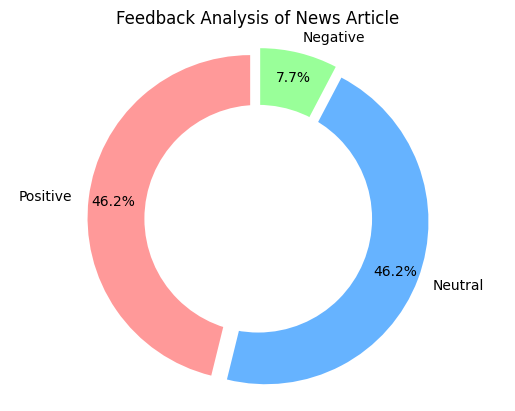

In [14]:
# Displaying the Analysis -->> Pie Chart

sentiments = [analyze_sentiment(tweet) for tweet in sentence]

positive_count = sentiments.count('Positive')
neutral_count = sentiments.count('Neutral')
negative_count = sentiments.count('Negative')

labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_count, neutral_count, negative_count]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0.05, 0.05)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors, explode=explode)
circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(circle)
ax.axis('equal')
plt.title('Feedback Analysis of News Article')
plt.show()



In [15]:
# Sentiment Analyze Counter
sentence=pd.DataFrame(sentence)
sentence.columns=['sentence']
sentence['sentiment'] = [str(analyze_sentiment(x)) for x in sentence.sentence]
sentence.sentiment.value_counts()


,count
sentiment,
Positive,6
Neutral,6
Negative,1


In [16]:
# Displaying the Text along with FeedBack
sentence

,sentence,sentiment
0,India becomes first team to win T World Cup wi...,Positive
1,| Photo Credit: K.R.,Neutral
2,Deepak / The HinduVirat Kohli and Rohit Sharma...,Neutral
3,| Photo Credit: K.R.,Neutral
4,Deepak / The HinduIndia beat South Africa by s...,Positive
5,India played nine games and won eight of those...,Positive
6,It’s last group stage game against Canada in F...,Negative
7,"This time, however, India eased past the Jos B...",Positive
8,Sreejesh interview: Miracle man of Kizhakkamba...,Neutral
9,V. SubrahmanyamDidn’t like chopping and changi...,Positive


In [17]:
# Departmental Analysis
department_keywords = {
    "Department of Economic Affairs (Ministry of Finance)": ["economic", "finance", "budget", "fiscal"],
    "Department of Expenditure (Ministry of Finance)": ["expenditure", "budget allocation", "financial planning"],
    "Department of Revenue (Ministry of Finance)": ["revenue collection", "taxation", "customs"],
    "Department of Financial Services (Ministry of Finance)": ["financial services", "banking", "insurance"],
    "Department of Commerce (Ministry of Commerce and Industry)": ["commerce", "trade", "export", "import"],
    "Department for Promotion of Industry and Internal Trade (Ministry of Commerce and Industry)": ["industry promotion", "internal trade", "industrial growth"],
    "Department of Telecommunications (Ministry of Communications)": ["telecommunications", "telecom regulations", "internet services"],
    "Department of Posts (Ministry of Communications)": ["postal services", "mail delivery"],
    "Department of Space (Department of Space)": ["space exploration", "satellite technology"],
    "Department of Atomic Energy (Department of Atomic Energy)": ["atomic energy", "nuclear power"],
    "Department of Science and Technology (Ministry of Science and Technology)": ["science research", "technology development"],
    "Department of Biotechnology (Ministry of Science and Technology)": ["biotechnology", "biomedical research"],
    "Department of School Education and Literacy (Ministry of Education)": ["school education", "literacy programs"],
    "Department of Higher Education (Ministry of Education)": ["higher education", "universities"],
    "Department of Agriculture, Cooperation, and Farmers Welfare (Ministry of Agriculture and Farmers Welfare)": ["agriculture", "cooperation", "farmer", "welfare"],
}

article_classification = {department: "" for department in department_keywords}
departments_found = []

for article in indiawords:
    for department, keywords in department_keywords.items():
        for keyword in keywords:
            if keyword in article.lower():
                article_classification[department] = keyword
                departments_found.append(department)
                break
        if article_classification[department]:
            break

unique_departments = set(departments_found)
print("The News Article is Associated with Departments:", ', '.join(unique_departments))

The News Article is Associated with Departments: 


In [18]:
# Sending Notification to the PIB Officers

email_sender = 'hashtaglongrangers@gmail.com'
email_password = 'qmuirvgmdxeegace'
email_receiver = 'arnavrangari13@gmail.com'

sentiments = ['Positive', 'Neutral', 'Negative']
counts = [10, 15, 5]
scores = [4.5, 3.0, 1.5]

average_score = sum(scores) / len(scores)
sentiment_distribution = counts

colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0.05, 0.05)

fig, ax = plt.subplots()
ax.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors, explode=explode)
circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(circle)
ax.axis('equal')
plt.title('Feedback Analysis of News Article')

plt.savefig("donut_chart.png")

plt.figure(figsize=(8, 6))
plt.bar(sentiments, sentiment_distribution, color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig("sentiment_distribution.png")

subject = 'Feedback Analysis Report'
body = "Alert: Please find the feedback analysis of current news here - "

em = EmailMessage()
em['From'] = email_sender
em['To'] = email_receiver
em['Subject'] = subject
em.set_content(body)

with open("donut_chart.png", "rb") as img_file:
    image = MIMEImage(img_file.read(), name="donut_chart.png")
em.add_attachment(image)

with open("sentiment_distribution.png", "rb") as img_file:
    image = MIMEImage(img_file.read(), name="sentiment_distribution.png")
em.add_attachment(image)

body += f"\nAverage Sentiment Score: {average_score:.2f}"
body += f"\nSentiment Distribution: {sentiment_distribution}"

context = ssl.create_default_context()

with smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context) as smtp:
    smtp.login(email_sender, email_password)
    smtp.send_message(em)

plt.close('all')
print("Notification Sent Successfully !!")

Notification Sent Successfully !!


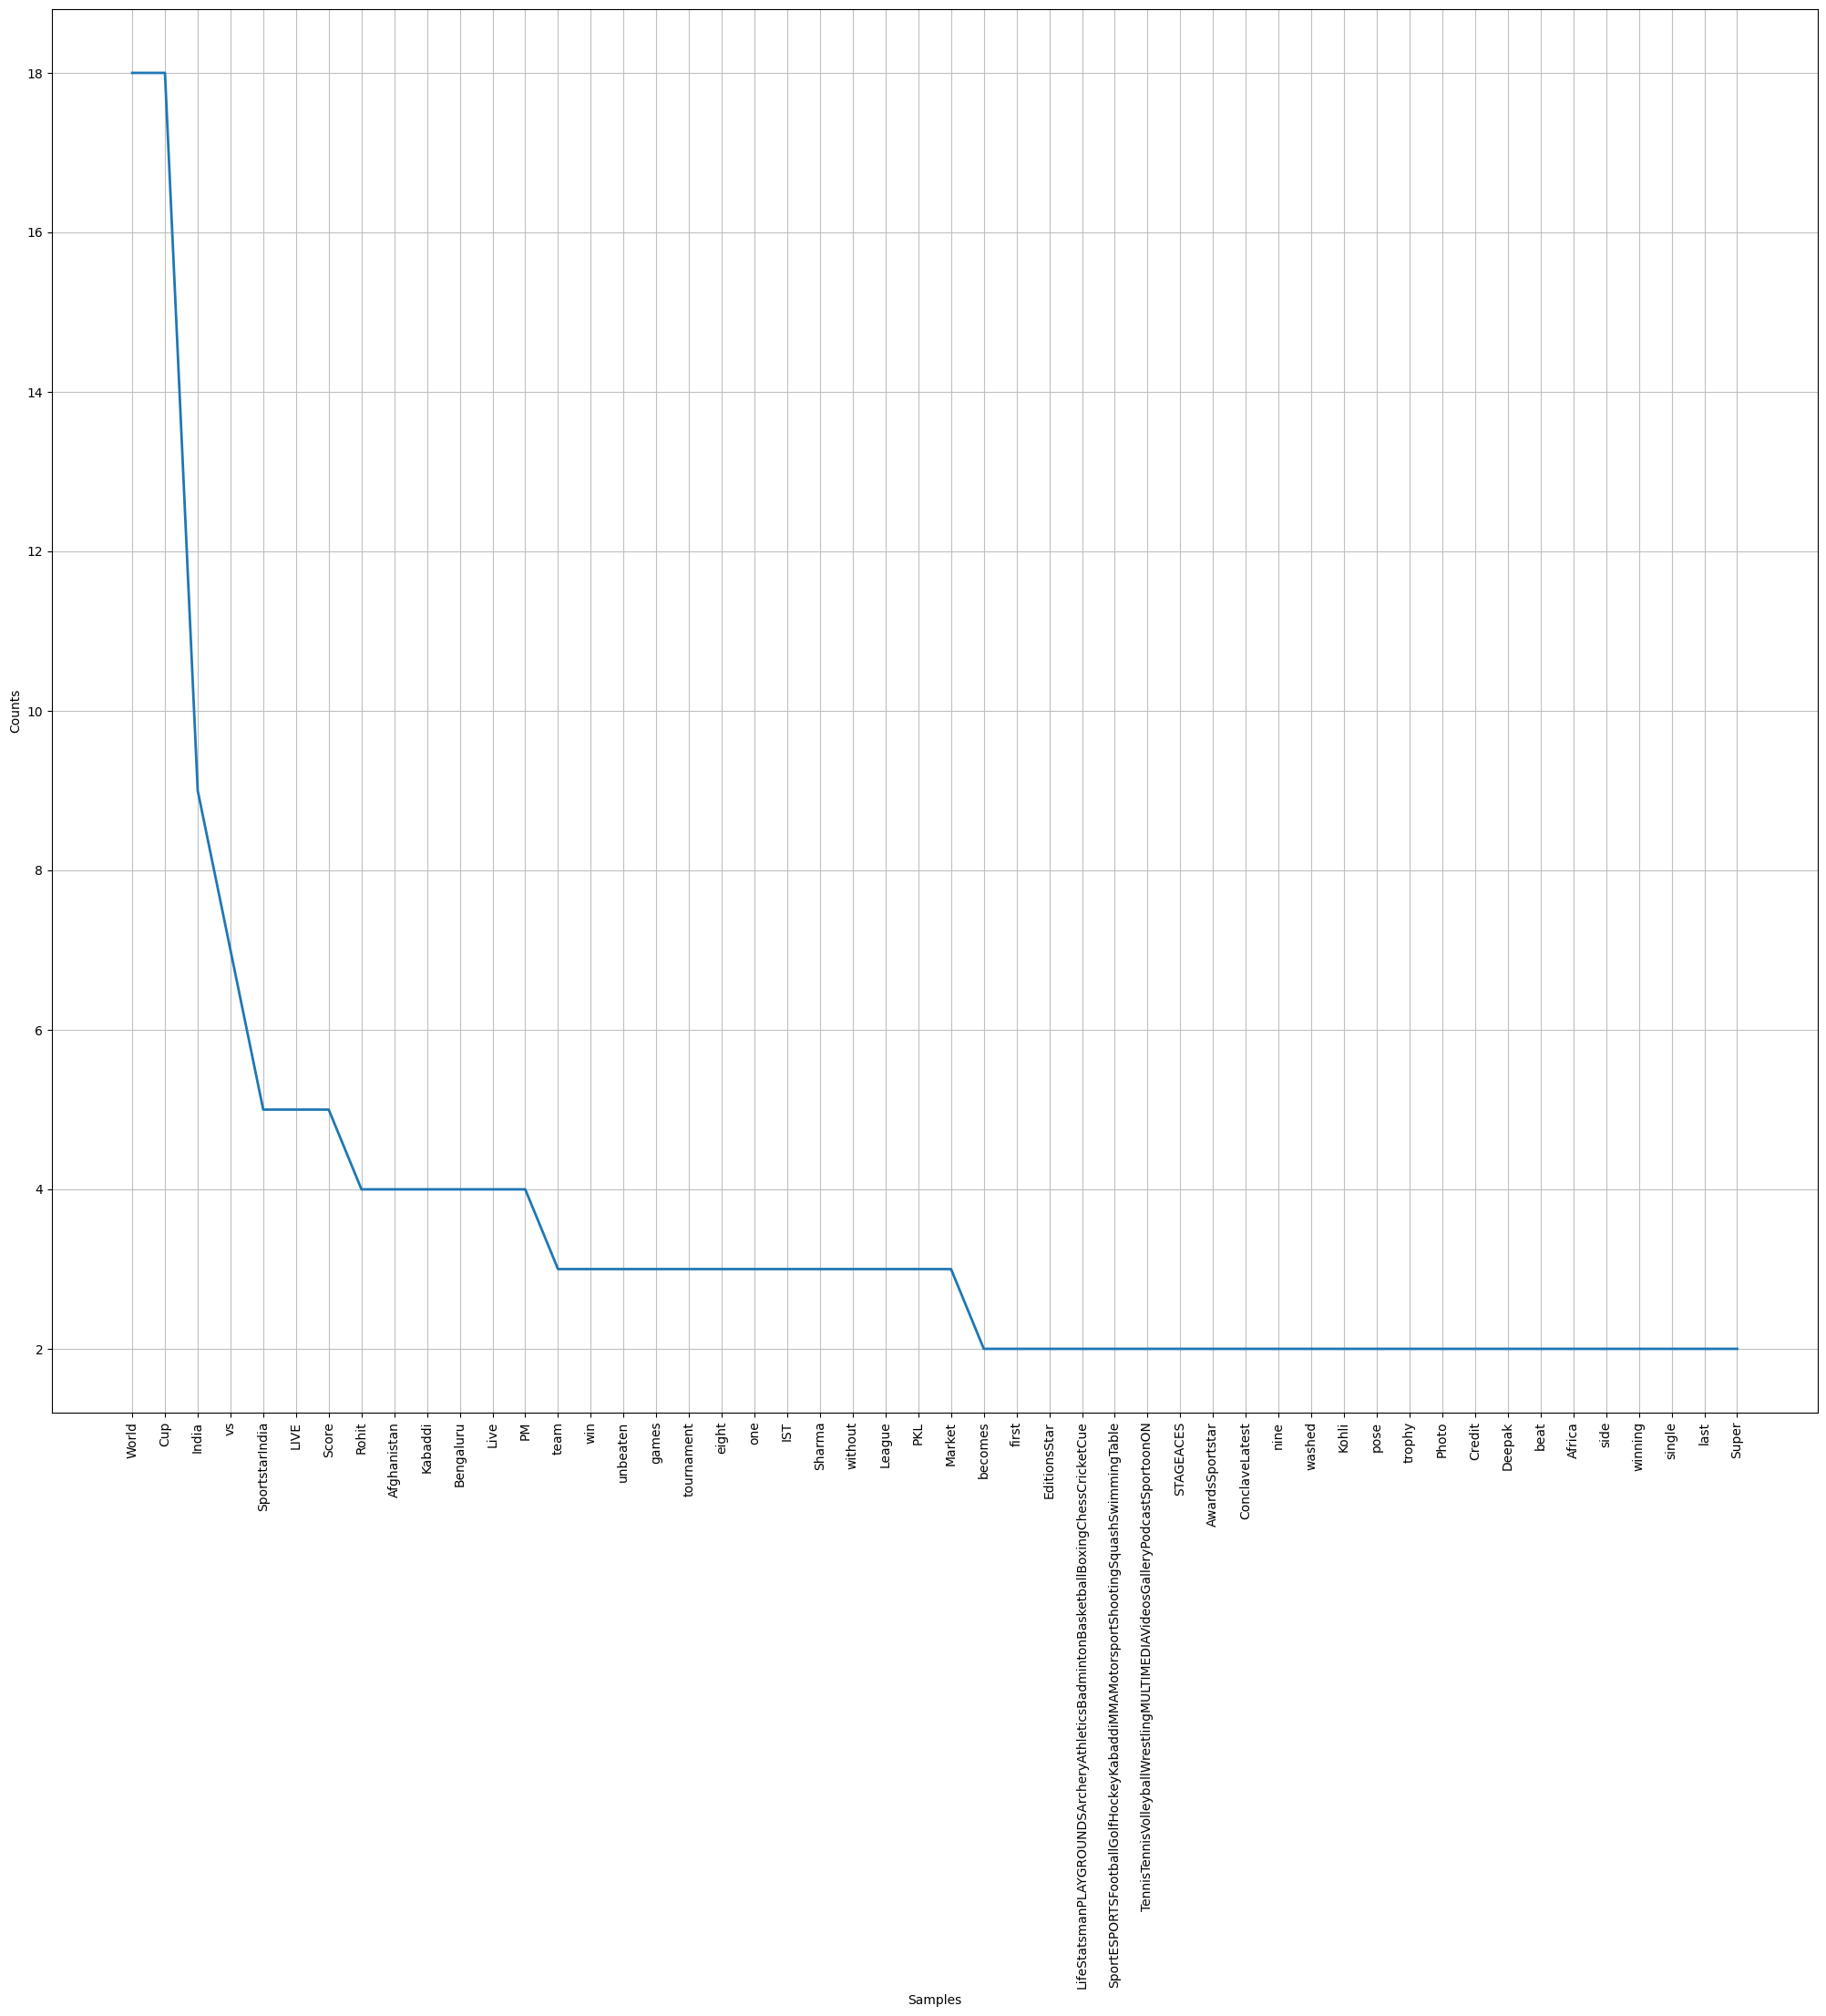

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
# Plotting the graph according to feedback collected For the Admin
indiawords = word_tokenize(india)
indiawords = [word for word in indiawords if word.isalnum()]
stop_words = set(stopwords.words('english'))
indiawords = [word for word in indiawords if word.isalnum() and word.lower() not in stop_words]
wordfreq = FreqDist(indiawords)
plt.figure(figsize=(25,20))
wordfreq.plot(50, cumulative=False)

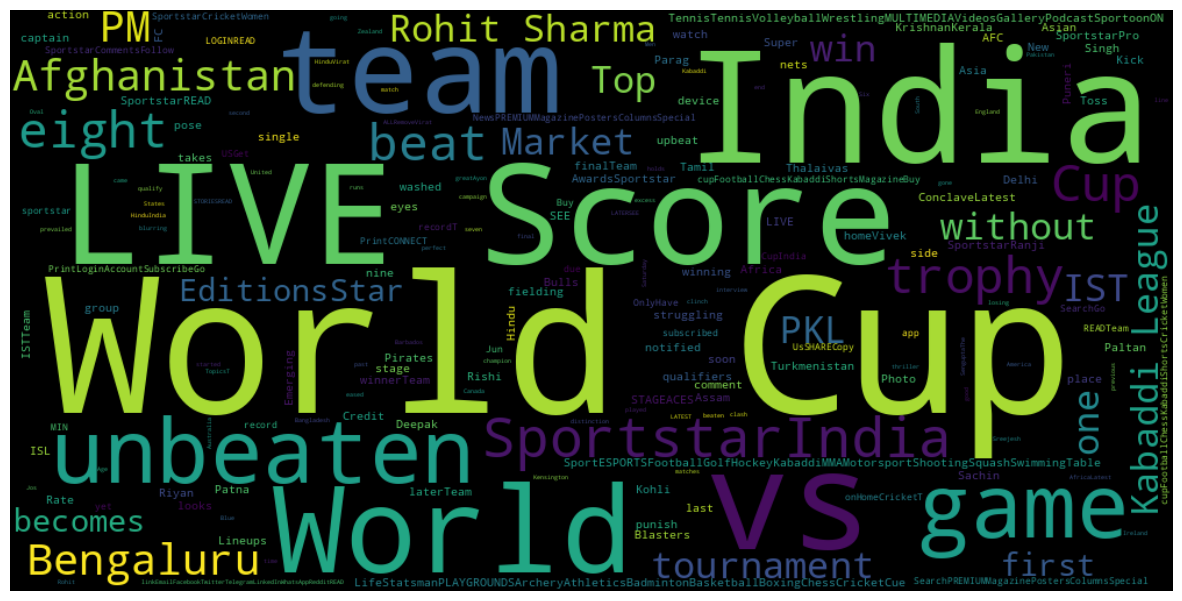

In [20]:
# Generating the Word Cloud
india_words=(" ").join(indiawords)
wordcloud = WordCloud(width=1000, height=500).generate(india_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()